<h1> Openclassroom Projet 10

<n>

<n>

<n>

<n>

<h1>Detection de faux billets avec Python

<img src="https://user.oc-static.com/upload/2020/11/25/16063163322759_Screen%20Shot%202020-11-05%20at%2011.15.15.png" alt="">

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h2>Importation des librairies

In [864]:
# Librairies classiques de data analyse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classe de régression linéaire
from sklearn.linear_model import LinearRegression

# Classes utilisées pour le scaling et le split des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Fonctions et classes utilisées pour tester les hypothèses de la régression linéaire
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from scipy.stats import shapiro

# Classes de différents classificateurs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Classe utilisée pour créer un score personnalisé afin d'évaluer les modèles
from sklearn.metrics import make_scorer, classification_report, confusion_matrix

# Classe utilisée pour l'optimisation d'hyperparamètres
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score, GridSearchCV

# Classe pour la génération de nombre aléatoire
from scipy.stats import uniform, randint

# Utilisé pour éviter l'affichage de certains warnings 
import warnings
warnings.filterwarnings('ignore')›

# Classe utilisée pour la création d'un pipeline
from sklearn.pipeline import Pipeline

import statsmodels as sm

<n>

<n>

<n>

<n>

<n>

<h2>Analyse exploratoire du dataframe

<n>

<n>

<h2>Importation et découverte des données.

In [865]:
billets = pd.read_csv('billets.csv', sep=';')
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [866]:
billets.shape

(1500, 7)

<strong> Nous avons un dataframe composé de 1500 lignes (nos billets) et 7 colonnes (nos features) dont la colonne "is_genuine" qui nous indique si le billet est vrai ou faux via un booleen.
    
<strong>Voyons la proportion vrai/faux des billets:

In [867]:
billets.loc[billets['is_genuine'] == 1]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
995,True,171.66,103.92,103.47,4.26,2.83,113.20
996,True,172.16,103.72,103.61,4.30,2.72,113.51
997,True,171.78,103.38,104.22,4.23,3.07,113.77
998,True,171.44,103.96,103.92,3.68,2.89,113.21


In [868]:
billets.loc[billets['is_genuine'] == 0]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1000,False,172.28,103.95,103.91,4.78,3.31,111.40
1001,False,171.92,103.86,104.30,4.96,3.13,111.29
1002,False,171.59,104.14,104.38,4.97,3.47,111.22
1003,False,172.02,104.33,104.33,5.19,3.21,111.99
1004,False,172.55,104.25,104.23,5.60,3.13,111.72
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


Text(0.5, 1.0, 'Vrais et faux billets')

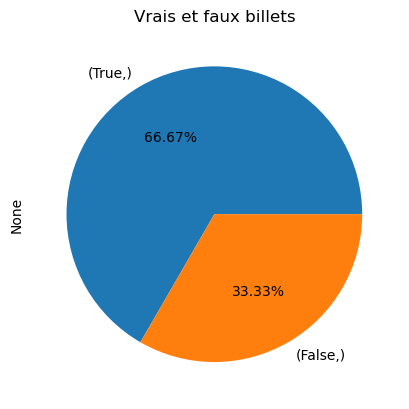

In [869]:
billets[['is_genuine']].value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Vrais et faux billets')

<n>

<n>

<h4>Nous avons 1000 vrais billets et 500 faux.

<n>

<n>

In [870]:
billets.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

<strong> Pour les besoins de notre analyse en machine learning nous avons besoin que la variable is_genuine soit numérique. Nous allons donc devoir faire la conversion

In [871]:
billets["is_genuine"] = billets["is_genuine"].replace({True: 1, False: 0}) 

In [872]:
billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

<h4> Nous pouvons remarquer aussi 37 données manquantes pour la colonne "margin_low" que nous allons traiter plus tard si la variable est significative pour notre analyse

<n>

In [873]:
rows_with_nan = data[data.isna().any(axis=1)]
rows_with_nan

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,563.565174,347.038211,317.800660,NaN,14.024590,129.281267
99,True,563.532397,347.639490,320.043236,NaN,13.549911,129.613668
151,True,563.991273,346.737572,320.657640,NaN,13.032080,129.441737
197,True,561.959108,346.269910,318.875867,NaN,15.621235,129.831449
241,True,563.204629,347.873321,319.674593,NaN,13.032080,128.788396
251,True,563.106298,344.933735,315.865286,NaN,12.730012,129.774138
284,True,563.499620,346.837785,318.752987,NaN,13.938285,129.854373
334,True,563.270182,346.403528,319.367391,NaN,12.945775,129.934608
410,True,565.597339,346.470337,317.984981,NaN,13.463606,129.464661
413,True,564.745141,346.269910,317.954261,NaN,13.636217,129.464661


<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h2>Analyse descriptive des données 

<h4>Comparaison des vrais et faux billets par features

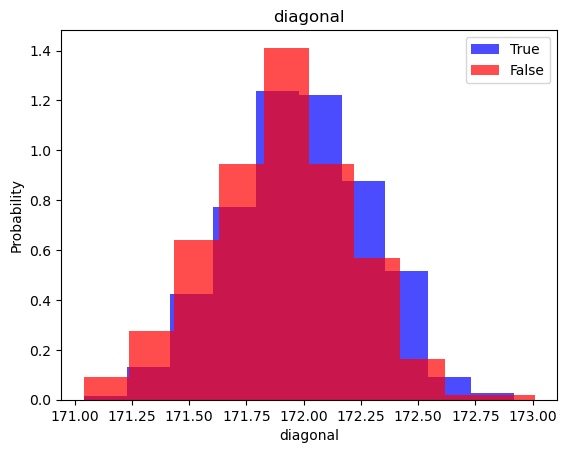

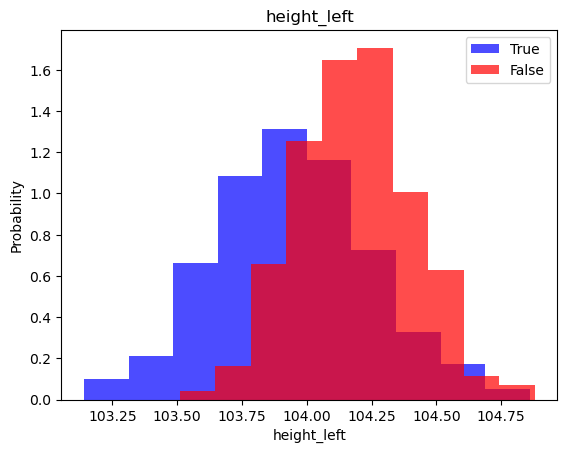

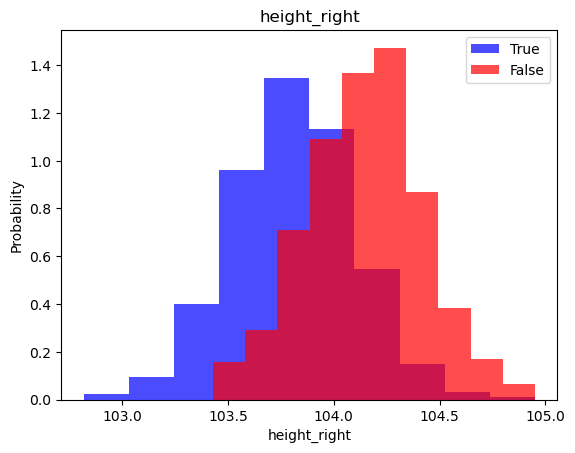

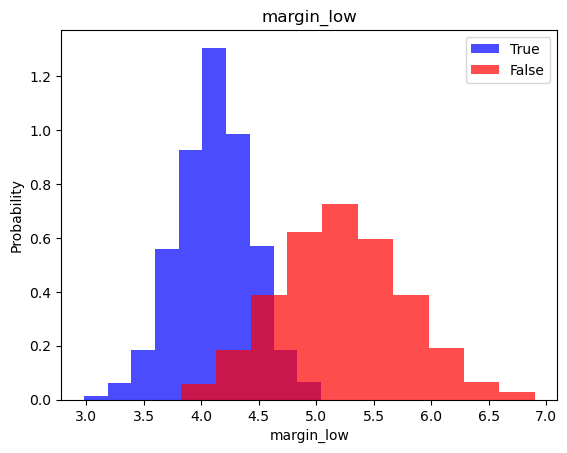

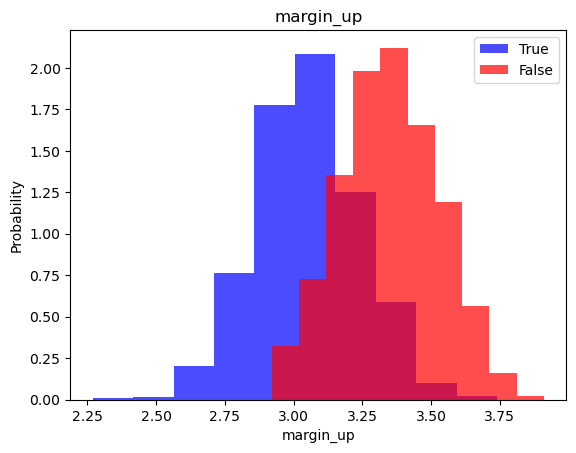

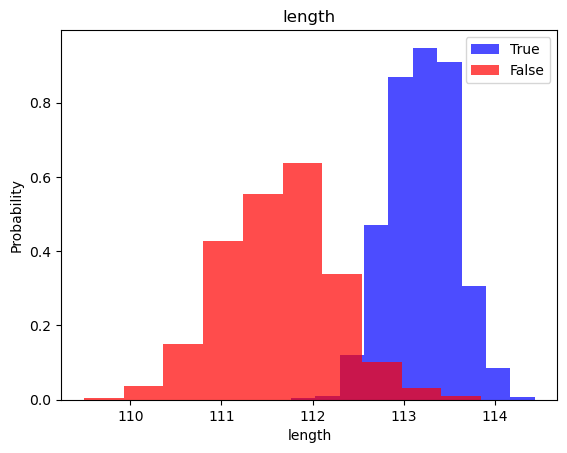

In [874]:
for label in cols[1:]:
    plt.hist(billets[billets["is_genuine"] == 1][label], color='blue', label='True', alpha=0.7, density=True)
    plt.hist(billets[billets["is_genuine"] == 0][label], color='red', label='False', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

<h4> On peut voir dans ces histogrammes que 3 features sortent du lot et marquent la difference entre les vrais et faux billets :
    <ul>
        <li> Length
        <li> Margin_low
        <li> Margin_up

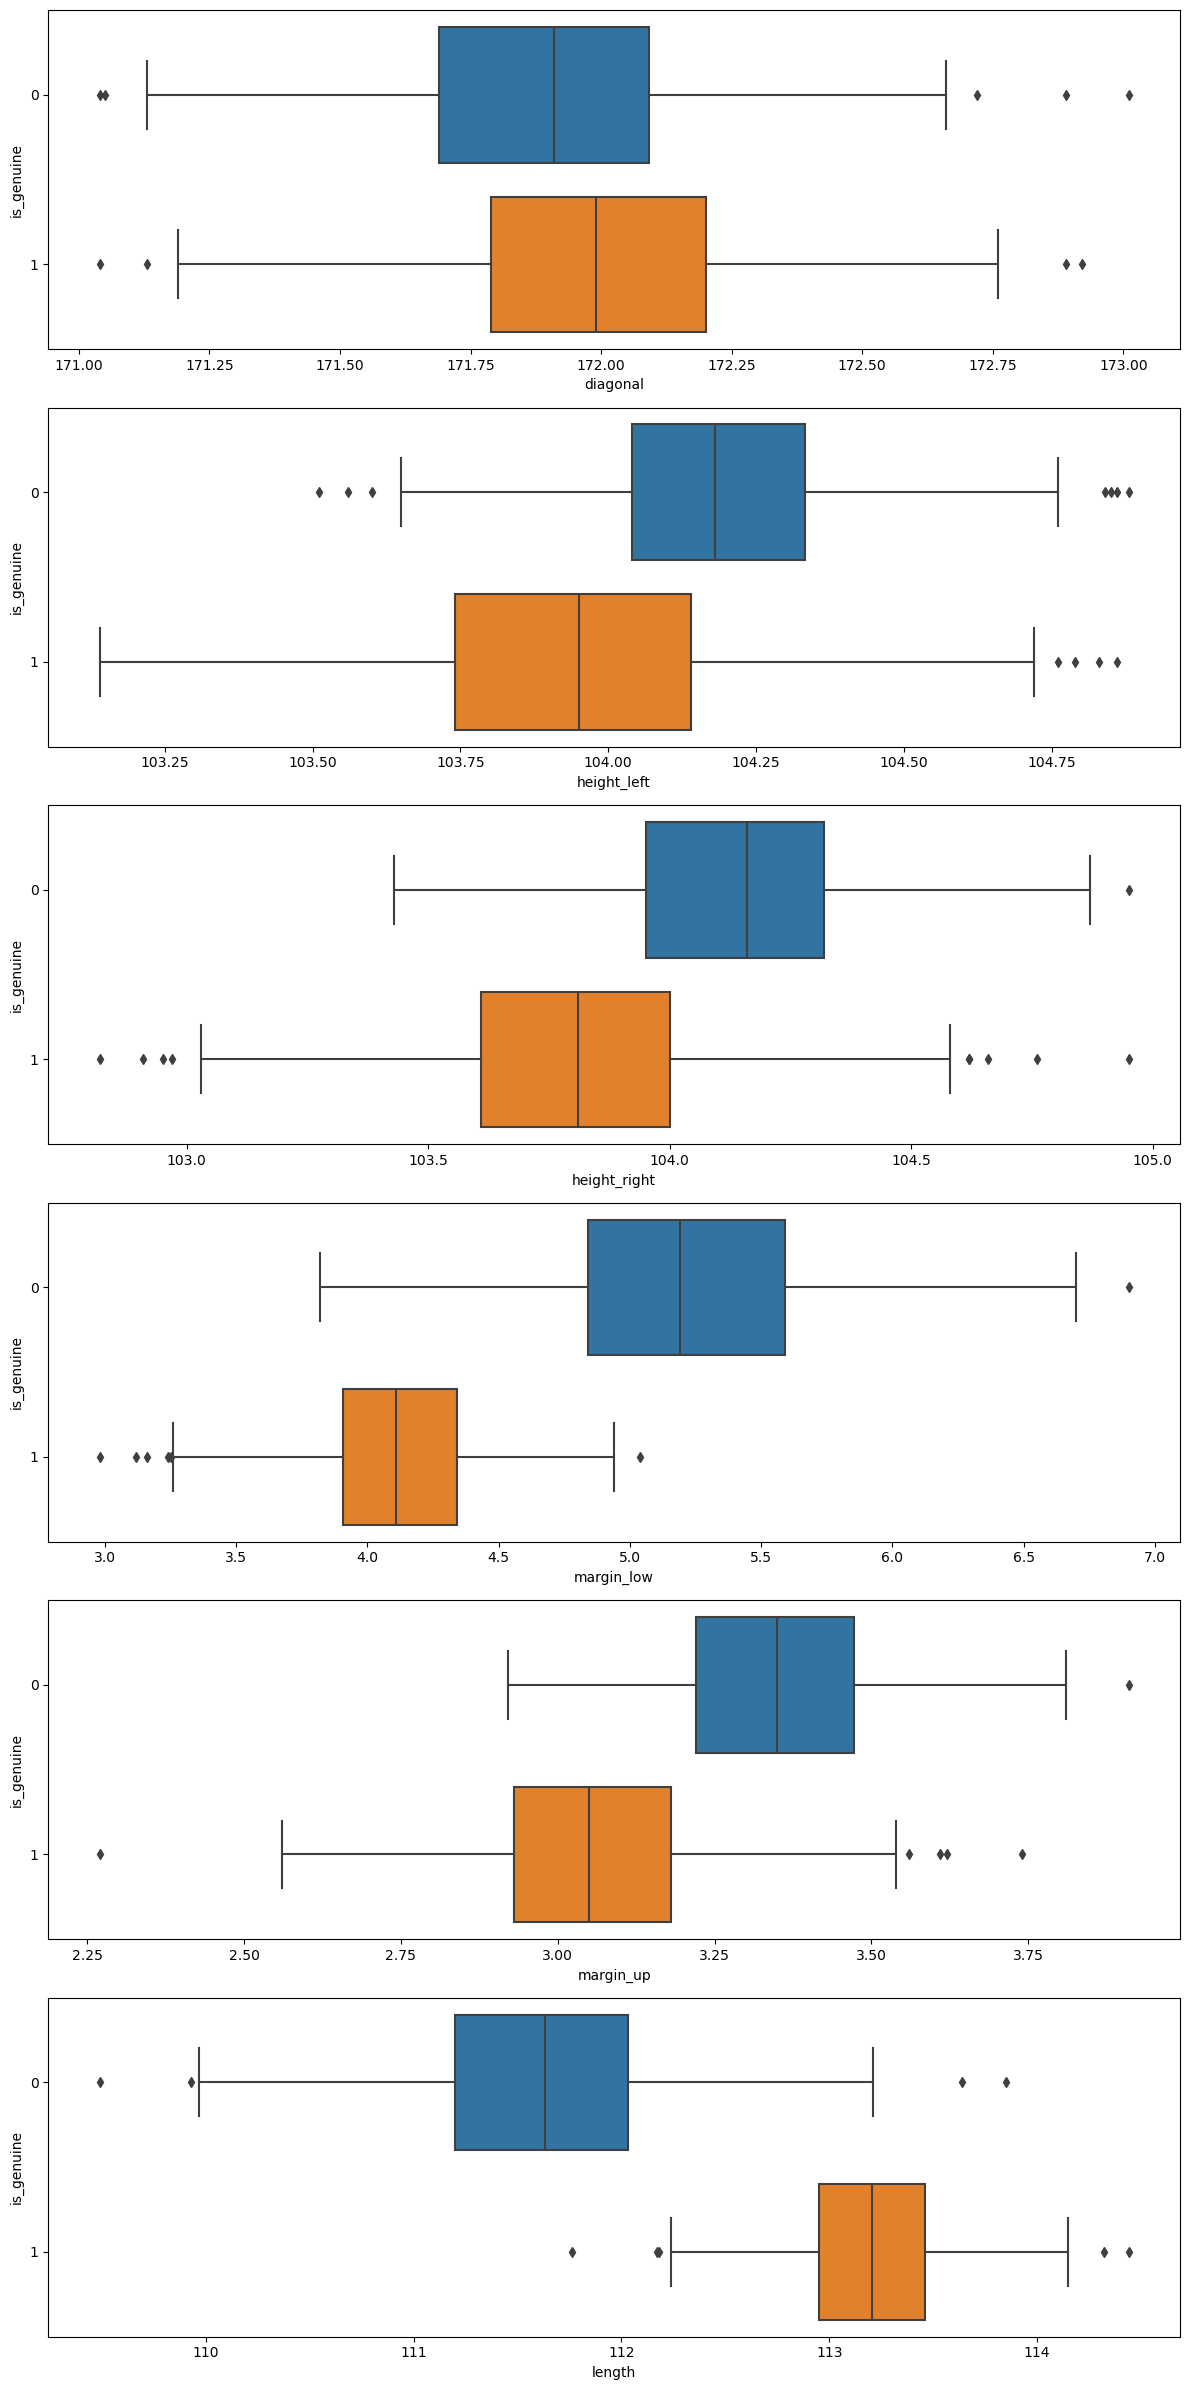

In [875]:
columns_to_plot = billets.columns[1:]

# Configure the figure
fig, axs = plt.subplots(6, 1, figsize=(12, 24))

# Create boxplots using a loop
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=billets, x=col, y='is_genuine', orient="h", ax=axs[i])

# Optional: Customize the plot (titles, labels, etc.)
# You can add labels, adjust spacing, or set titles here for further customization

plt.tight_layout()
plt.show()

<n>

<n>

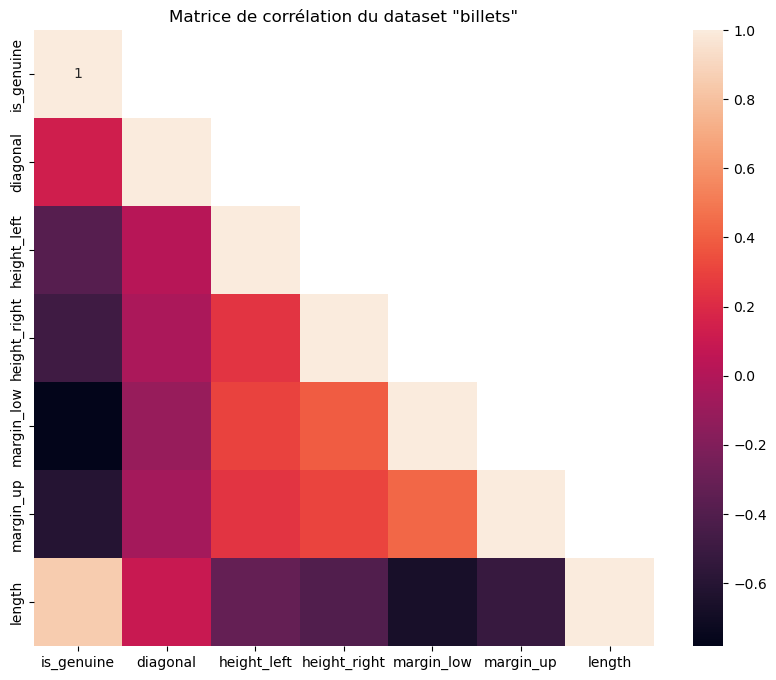

In [876]:
maskLowerTriangle = ~np.tril(np.ones(billets.corr().shape)).astype(bool) 

# création de la figure
plt.figure(figsize=(10, 8))
plt.title('Matrice de corrélation du dataset "billets"') 
sns.heatmap(billets.corr(), mask=maskLowerTriangle, annot=True) # carte de fréquentation.
plt.show()


In [877]:
print(billets.corr())

              is_genuine  diagonal  height_left  height_right  margin_low  \
is_genuine      1.000000  0.132756    -0.379833     -0.485092   -0.783032   
diagonal        0.132756  1.000000     0.019472     -0.024492   -0.111534   
height_left    -0.379833  0.019472     1.000000      0.242279    0.302643   
height_right   -0.485092 -0.024492     0.242279      1.000000    0.391085   
margin_low     -0.783032 -0.111534     0.302643      0.391085    1.000000   
margin_up      -0.606262 -0.055649     0.246522      0.307005    0.431606   
length          0.849285  0.097587    -0.320863     -0.401751   -0.666753   

              margin_up    length  
is_genuine    -0.606262  0.849285  
diagonal      -0.055649  0.097587  
height_left    0.246522 -0.320863  
height_right   0.307005 -0.401751  
margin_low     0.431606 -0.666753  
margin_up      1.000000 -0.520575  
length        -0.520575  1.000000  


<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h1> Imputation des données manquantes par régression linéaire

<h4>  Il existe IterativeImputer utilise les lignes ne contenant pas de NAN pour entrainer un modèle et prédire nos données manquantes mais pour cet exercice nous allons utiliser une regression linéaire pour imputer les données manquantes

<h1>Hypothèses de validité 

<h2> R² / R² ajusté et les informations relatives aux variables 

R-squared, also known as the coefficient of determination, measures the predictive quality of your model. R-squared is defined as the amount of variation of the target variable which is explained by your model.

R-squared is always positive and lower than 1 and the higher the better

In [882]:
import statsmodels.formula.api as smf

model = smf.ols(formula='margin_low ~ is_genuine + diagonal + height_left + height_right + margin_up + length', data=billets)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Mon, 22 Jul 2024   Prob (F-statistic):          4.75e-299
Time:                        23:49:41   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8668      8.316      0.345   

<h4>Résumé du modèle:

<li>Modèle: OLS (Ordinary Least Squares)
<li>Variable dépendante: margin_low
<li>Variables indépendantes: is_genuine, diagonal, height_left, height_right, length

<li>R-squared (0.613) et Adjusted R-squared (0.612) : Ces deux valeurs indiquent que le modèle explique environ 61% de la variance de la variable dépendante. Un R-squared plus élevé signifie un meilleur ajustement du modèle aux données. L'Adjusted R-squared pénalise l'ajout de variables inutiles, ce qui le rend généralement plus pertinent pour la comparaison de modèles.
<li>F-statistic (462.4) et Prob (F-statistic) (1.42e-297) : Cette statistique de test permet de vérifier si au moins une des variables indépendantes est significativement liée à la variable dépendante. Une valeur de p très faible (proche de 0) indique que l'hypothèse nulle (aucune variable n'est significative) est rejetée, ce qui confirme l'existence d'une relation entre les variables.

<h4>Analyse des coefficients:

<li>Variable la plus significative: <strong>is_genuine</strong> est la variable dont l'effet sur margin_low est le plus statistiquement significatif. Cela suggère que la caractéristique is_genuine est un facteur important pour expliquer les variations de margin_low.

<strong>Conclusion préliminaire

<li>Le modèle de régression semble expliquer une part importante de la variabilité de la variable margin_low.
Certaines variables indépendantes ont un effet significatif sur la variable dépendante.

<strong>Analyse des variables :


<li>is_genuine : p-value = 0.000 (très significative)
<li>diagonal : p-value = 0.645 (non significative)
<li>height_left : p-value = 0.512 (non significative)
<li>height_right : p-value = 0.511 (non significative)
<li>margin_up : p-value = 0.000 (très significative)
<li>length : p-value = 0.883 (non significative)

In [884]:
model = smf.ols(formula='margin_low ~ is_genuine + margin_up', data=billets)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):          1.24e-304
Time:                        23:50:47   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9263      0.198     30.003      0.0

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h1>Colinéarité :

In [885]:
billets.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


<Axes: >

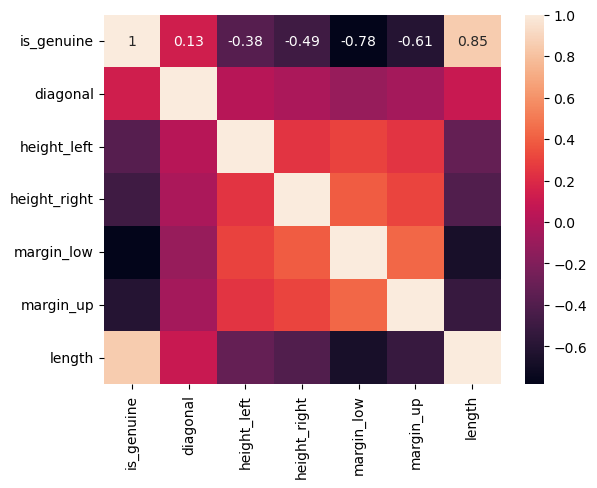

In [886]:
sns.heatmap(billets.corr(), annot=True)

In [887]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant 
import pandas as pd
import numpy as np

X = billets[['is_genuine','margin_up']]
X = add_constant(X)  # Add constant term to predictors

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

     Variable         VIF
0       const  333.461762
1  is_genuine    1.581162
2   margin_up    1.581162


<li>VIF = 1: No correlation between this predictor and the others
<li>1 < VIF < 5: Moderate correlation
<li>5 <= VIF < 10: High correlation
<li>VIF >= 10: Very high correlation, indicating potential problems with multicollinearity

<strong>Based on the Variance Inflation Factor (VIF) results shown, here's how we can interpret them:</strong>


<li>Both 'is_genuine' and 'margin_up' have the same VIF of 1.581162. This value is relatively low, indicating that there isn't severe multicollinearity between these variables.


<strong>Overall interpretation:</strong>

<li>NThe VIF values for 'is_genuine' and 'margin_up' (1.581162) are well below the threshold of concern. This suggests that these variables do not exhibit problematic multicollinearity.
    
<li>You can safely use both 'is_genuine' and 'margin_up' in your regression model for imputing missing values without worrying about multicollinearity issues.

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h2>Homoscédasticité :

def: 

L'homoscédasticité fait référence à une situation où la variance des erreurs (ou résidus) dans un modèle de régression est constante pour toutes les valeurs des variables indépendantes. En d'autres termes, la dispersion des points autour de la ligne de régression est à peu près la même pour toutes les valeurs prédites.
Points clés sur l'homoscédasticité :

Hypothèse importante : C'est une des hypothèses fondamentales de la régression linéaire.

Opposé de l'hétéroscédasticité : Quand cette condition n'est pas remplie, on parle d'hétéroscédasticité.

Importance pour la fiabilité : L'homoscédasticité assure que les estimations des coefficients de régression sont les plus efficaces (c'est-à-dire avec la variance minimale).

Vérification : On peut la vérifier visuellement avec des graphiques de résidus ou par des tests statistiques comme le test de Breusch-Pagan.

Conséquences de la violation : L'hétéroscédasticité peut conduire à des erreurs standard biaisées et donc à des intervalles de confiance et des tests d'hypothèse non fiables.

Corrections : En cas d'hétéroscédasticité, on peut utiliser des erreurs standard robustes, des transformations de variables, ou des méthodes de régression pondérée.

L'homoscédasticité est cruciale pour s'assurer que les inférences statistiques tirées d'un modèle de régression sont valides et fiables.

<n>

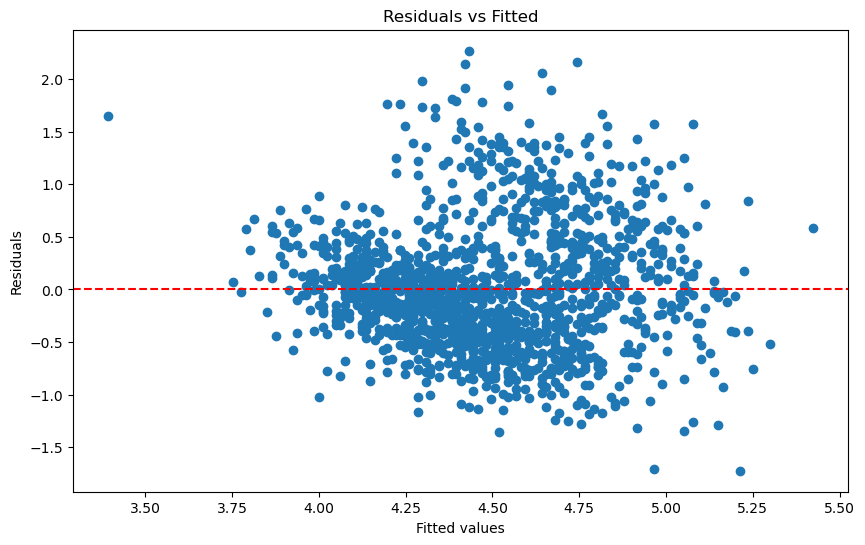

Breusch-Pagan test results:
LM Statistic: 41.6335
LM-Test p-value: 0.0000
F-Statistic: 42.7944
F-Test p-value: 0.0000


In [888]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming you've already fit your model
model = smf.ols(formula='margin_low ~ + margin_up', data=billets)
results = model.fit()

# 1. Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 2. Breusch-Pagan Test
bp_test = het_breuschpagan(results.resid, results.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print('Breusch-Pagan test results:')
for label, value in zip(labels, bp_test):
    print(f'{label}: {value:.4f}')

<strong>Interpreting the results:

<strong>Graphique des résidus :

<li>Le graphique montre une certaine structure dans la dispersion des résidus :

La variance des résidus semble augmenter légèrement avec les valeurs ajustées.
On observe une forme de "cône" ou de "entonnoir", avec une dispersion plus large des résidus pour les valeurs ajustées plus élevées.
Cette tendance indique une possible hétéroscédasticité.
    

<strong>For the Breusch-Pagan test:

<li>Statistique LM : 41,6335 (valeur élevée, suggérant l'hétéroscédasticité)
<li>Les p-valeurs très faibles (0,0000) pour les deux tests indiquent que nous rejetons l'hypothèse nulle d'homoscédasticité.

<strong>Conclusion:
<li>Ce modèle viole l'hypothèse d'homoscédasticité. La variance des résidus n'est pas constante pour toutes les valeurs prédites, ce qui peut conduire à des estimations inefficaces et potentiellement à des inférences peu fiables. à surveiller



<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h1>Normalité des résidus :

def:

<h4> Les residus d'une bonne regression linéaire doivent etre:
<li>Normalement distribués
<li>Non auto-corrélés 
<li>Avec une variance constante

<h3>Distribution :

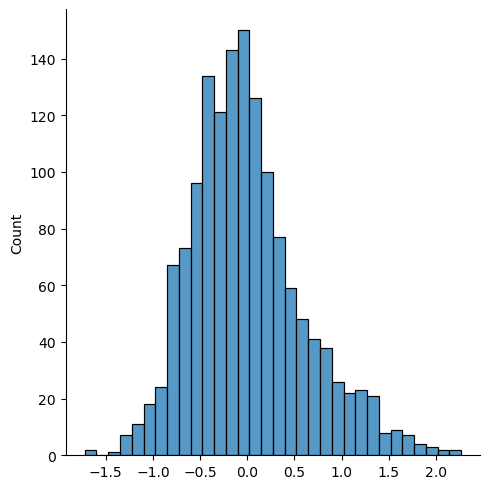

In [889]:
sns.displot(results.resid)

In [890]:
from statsmodels.stats.api import jarque_bera 
jarque_bera(results.resid)[1]

2.3787800977435977e-31

Nos la forme de cet histogramme de nos données on l'air de suivre une loi normale, caracterisée par une forme de cloche,  nous pouvons continuer

<n>

<n>

<n>

<n>

<n>

<h2> Auto corrélation:

def:

In [891]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(results.resid, axis=0)

1.3208023764465684

<strong>Interpretation:
    
Le test de Durbin-Watson produit une valeur comprise entre 0 et 4. Une valeur proche de 0 indique une autocorrélation positive, tandis qu'une valeur proche de 4 indique une autocorrélation négative. Une valeur proche de 2 indique qu'il n'y a pas d'autocorrélation.

ci dessus, la valeur du test de Durbin-Watson est de 1,8886... Cette valeur est proche de 1, ce qui indique qu'il y a une très légère autocorrélation positive des résidus.

<n>

<n>

<n>

<n>

<n>

<n>

<h1> Prediction

In [892]:
#Prédiction de la valeur de margin_low à partir du modèle
margin_low_pred= results.predict(billets)#prediction de la valeur de margin_low
#transformer en df avec index conservé
df_margin_low_pred = pd.DataFrame(margin_low_pred)

billets.loc[billets.margin_low.isna(), 'margin_low'] = margin_low_pred

billets.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [1094]:
margin_low_pred

0       4.160327
1       4.284105
2       4.222216
3       4.308861
4       4.890621
          ...   
1495    4.407884
1496    4.754465
1497    4.742087
1498    4.865866
1499    4.754465
Length: 1500, dtype: float64

In [1092]:
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_CAH
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1
1,1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,1,172.69,104.48,103.50,4.40,2.94,113.16,1
3,1,171.36,103.91,103.94,3.62,3.01,113.51,1
4,1,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28,0
1496,0,172.19,104.63,104.44,5.27,3.37,110.97,0
1497,0,171.80,104.01,104.12,5.51,3.36,111.95,0
1498,0,172.06,104.28,104.06,5.17,3.46,112.25,0


<n>

<n>

<h1>CONCLUSION

<n>

Le modèle que nous avons développé s'est révélé efficace pour imputer les valeurs manquantes. Cependant, nous avons identifié un biais potentiel : la variable 'is_genuine' a été utilisée à la fois pour prédire les valeurs manquantes et comme variable cible dans notre modèle principal. Etant donné que les variables manquantes ne representent qu'environ 2,5% des 1500 billets nous pouvons les garder sans impacter les resultats

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h1> ACP

In [895]:
X = billets[["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]].values

In [896]:
scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

In [897]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5
mean,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


In [898]:
n_components = 6

In [899]:
from sklearn.decomposition import PCA

In [900]:

#instancie ACP
pca = PCA(n_components=n_components)

In [901]:
pca.fit(X_scaled)

PCA(n_components=6)

<h2> Variance

In [902]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([43.15, 16.96, 13.05, 11.84,  9.57,  5.44])

In [903]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 43.,  60.,  73.,  85.,  95., 100.])

In [904]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

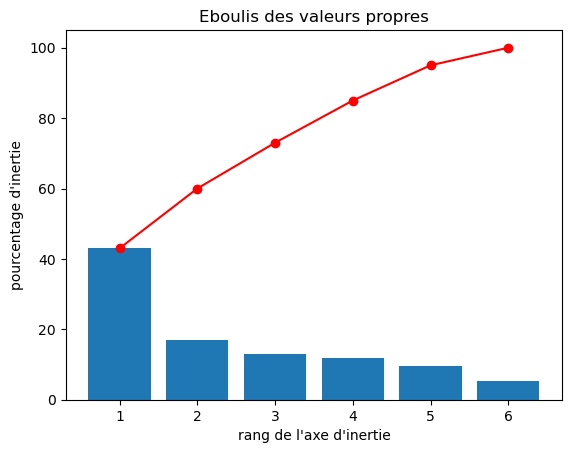

In [905]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [906]:
pcs = pca.components_
pcs

array([[-0.08458598,  0.33013972,  0.39365505,  0.50580712,  0.4418587 ,
        -0.52707563],
       [ 0.94047081,  0.30931327,  0.10933232, -0.07427674, -0.00579861,
         0.0483295 ],
       [-0.29283161,  0.88510982, -0.14825419, -0.12266299, -0.26797519,
         0.14830388],
       [-0.10124883, -0.06027053,  0.87284347, -0.10255735, -0.42900294,
         0.17233363],
       [-0.11104861,  0.08974812,  0.22168316, -0.56846984,  0.72015895,
         0.29779725],
       [ 0.0051376 ,  0.01504701,  0.01018314,  0.6244357 ,  0.1739084 ,
         0.76123545]])

Composants

In [907]:
pcs = pca.components_
pcs

array([[-0.08458598,  0.33013972,  0.39365505,  0.50580712,  0.4418587 ,
        -0.52707563],
       [ 0.94047081,  0.30931327,  0.10933232, -0.07427674, -0.00579861,
         0.0483295 ],
       [-0.29283161,  0.88510982, -0.14825419, -0.12266299, -0.26797519,
         0.14830388],
       [-0.10124883, -0.06027053,  0.87284347, -0.10255735, -0.42900294,
         0.17233363],
       [-0.11104861,  0.08974812,  0.22168316, -0.56846984,  0.72015895,
         0.29779725],
       [ 0.0051376 ,  0.01504701,  0.01018314,  0.6244357 ,  0.1739084 ,
         0.76123545]])

In [908]:
#Passage en dataframe
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5
0,-0.084586,0.330140,0.393655,0.505807,0.441859,-0.527076
1,0.940471,0.309313,0.109332,-0.074277,-0.005799,0.048329
2,-0.292832,0.885110,-0.148254,-0.122663,-0.267975,0.148304
3,-0.101249,-0.060271,0.872843,-0.102557,-0.429003,0.172334
4,-0.111049,0.089748,0.221683,-0.568470,0.720159,0.297797
5,0.005138,0.015047,0.010183,0.624436,0.173908,0.761235


In [909]:
features = billets[["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]].columns
features

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [910]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,-0.08,0.33,0.39,0.51,0.44,-0.53
F2,0.94,0.31,0.11,-0.07,-0.01,0.05
F3,-0.29,0.89,-0.15,-0.12,-0.27,0.15
F4,-0.10,-0.06,0.87,-0.10,-0.43,0.17
F5,-0.11,0.09,0.22,-0.57,0.72,0.30
F6,0.01,0.02,0.01,0.62,0.17,0.76


In [911]:
# Deux premieres composantes F1 et F2  
x_y = (0,1)
x_y

(0, 1)

In [912]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

   #Titre du graphique
    plt.title("Cercle des corrélations(F{} et F{}) ".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

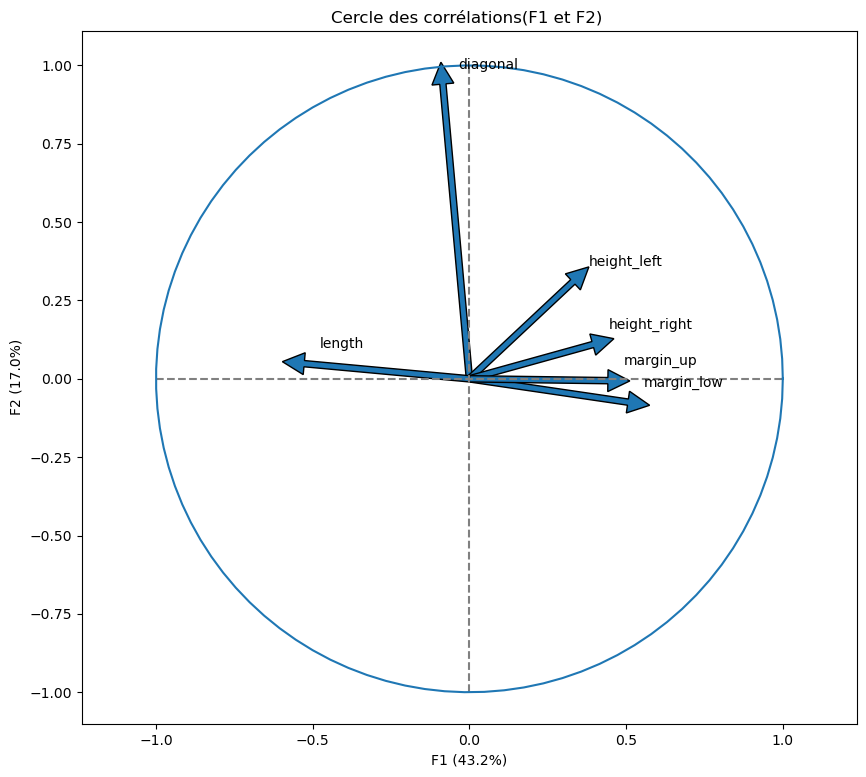

In [913]:
correlation_graph(pca, x_y, features)

<strong>Première observation : 
    
<li>La première composante principale (F1, 43.3% de la variance) semble principalement liée aux marges (margin_up, margin_low) et aux hauteurs (height_left, height_right).
    
<li>La deuxième composante principale (F2, 17.0% de la variance) est fortement corrélée à la diagonale.
  


<n>

<n>

<n>

<n>

<n>

<n>

<h1>Projection des dimensions

In [914]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 1.63987196,  0.75720422,  2.45030544,  3.15143532,  0.21221178,
         0.04165363],
       [-2.02106556, -2.20815038, -0.99265887,  0.09387586,  0.05977207,
        -0.49082327],
       [-0.97308577,  2.62081231,  1.16321019, -0.96076734, -0.83764572,
         0.2034342 ],
       [-1.37925701, -1.81435808,  0.67822835,  0.83647074,  0.78703103,
        -0.21717585],
       [ 0.1512188 , -0.56569844,  0.84887971, -1.77512966,  1.20254191,
        -0.30187507]])

In [915]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



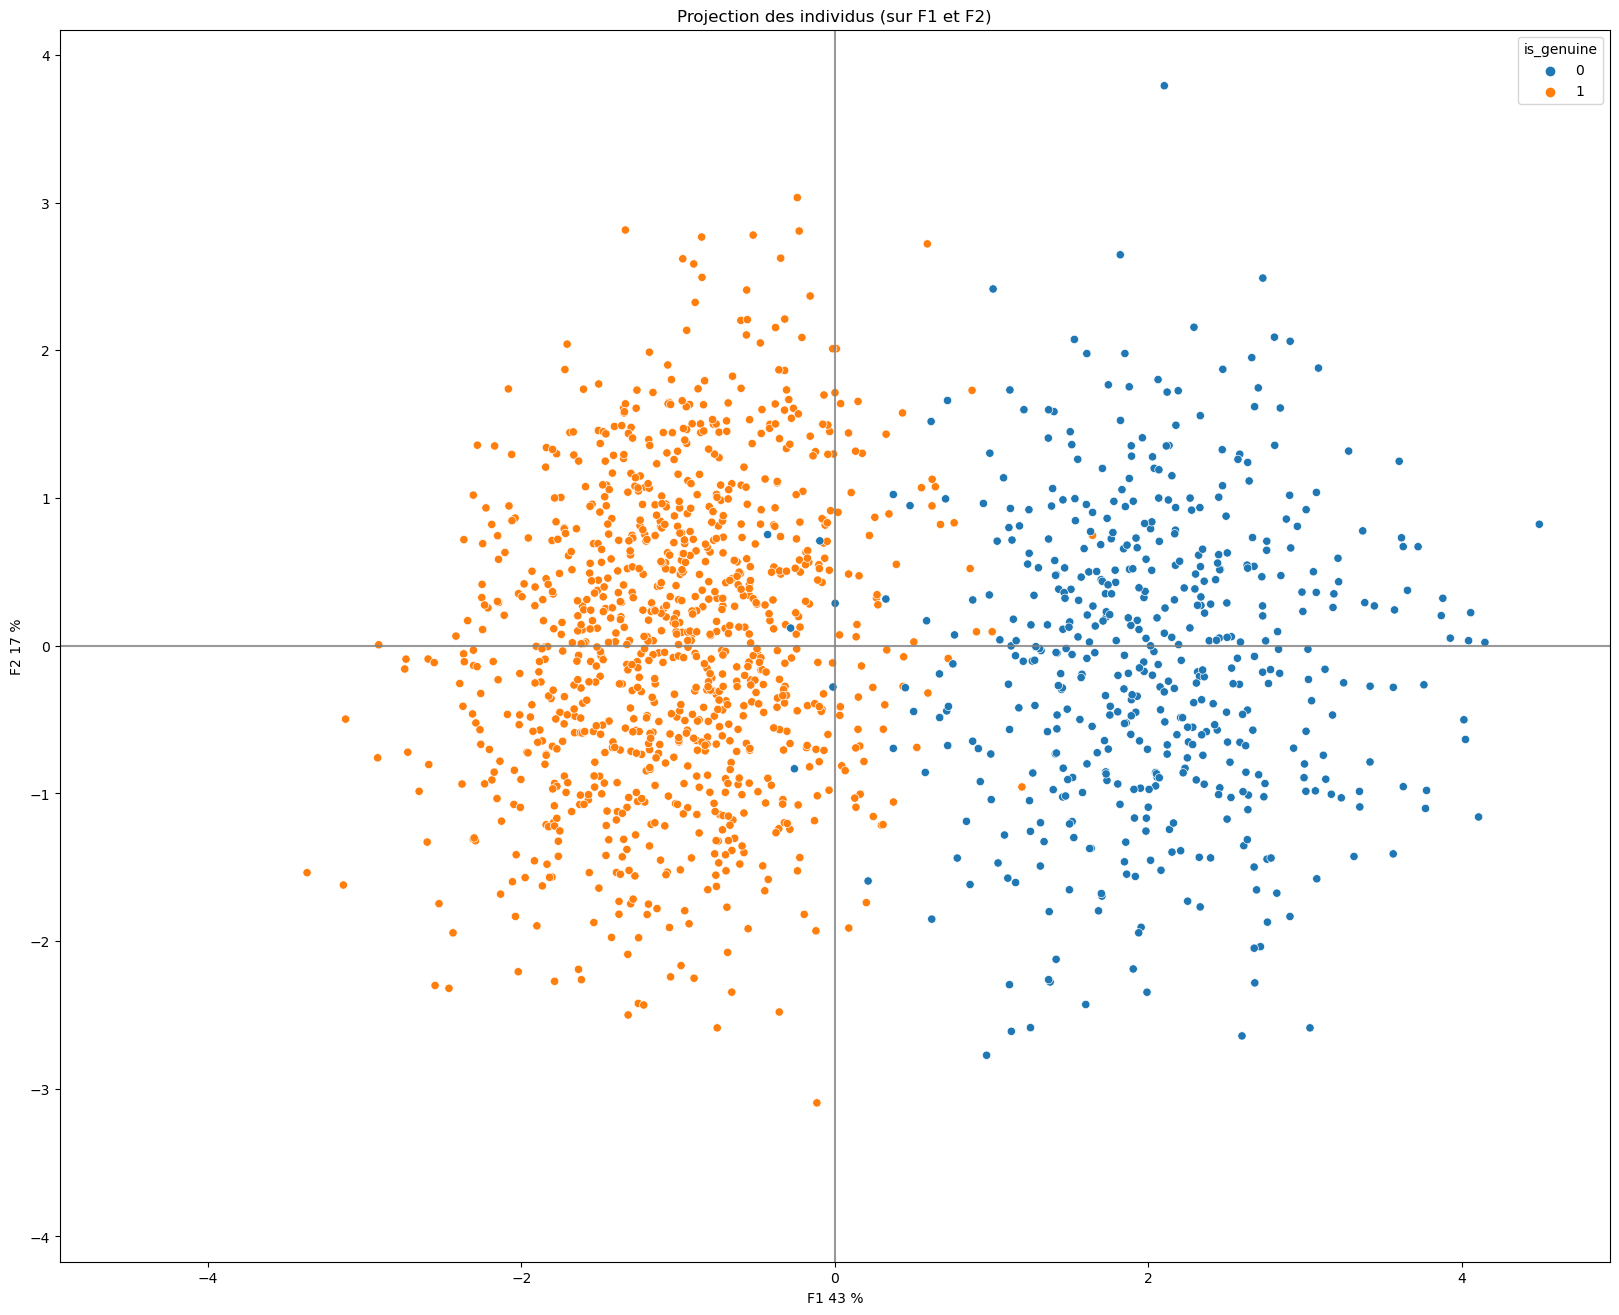

In [894]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), clusters=billets['is_genuine'], marker="o")

<n>


<strong>Graphique de corrélation (Cercle des corrélations) :


<li>Les deux premières composantes principales (F1 et F2) expliquent respectivement 43,2% et 17,7% de la variance totale, soit 60,9% cumulés.
    
<li>La variable "diagonal" est fortement corrélée positivement avec F1 et F2, ce qui suggère qu'elle est très discriminante.
    
<li>"Height_left" et "height_right" sont fortement corrélées entre elles et avec F1, mais moins avec F2.
    
<li>"Margin_low" et "margin_up" sont également fortement corrélées avec F1, mais peu avec F2.
    
<li>"Length" est corrélée négativement avec F1, ce qui indique une relation inverse avec les autres variables.


<strong>Projection des individus :


<li> Le groupe bleu (faux billets) est plus concentré et occupe principalement le côté droit du graphique, correspondant à des valeurs positives sur F1.
    
<li>Le groupe orange (vrais billets) est plus dispersé et se situe principalement du côté gauche, avec des valeurs négatives sur F1.
    
<li>Il y a un certain chevauchement entre les deux groupes, ce qui indique que la classification n'est pas parfaite, mais reste assez distincte.
    

<strong>CONCLUSION
    
En conclusion, l'ACP révèle que les caractéristiques géométriques des billets, en particulier la diagonale, la hauteur et les marges, sont des indicateurs efficaces pour différencier les vrais des faux billets. La longueur semble avoir un comportement inverse aux autres variables. Cette analyse suggère qu'un modèle de classification basé sur ces caractéristiques pourrait être assez performant pour détecter les faux billets, bien qu'il puisse y avoir quelques cas ambigus dans la zone de chevauchement.

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h1>Découverte des données

<n>

<n>

<h4>Partition des données avec train_test_split 

In [1050]:
X = billets[['diagonal','height_left','height_right','margin_low','margin_up','length']]
y= billets['is_genuine']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

<strong>Note:

<li>stratify: Ce paramètre permet de s'assurer que la distribution de la variable cible (la variable que l'on cherche à prédire) est conservée dans les deux ensembles (entraînement et test). C'est particulièrement important lorsque les classes sont déséquilibrées (par exemple, si vous avez beaucoup plus d'exemples d'une classe que d'une autre).
    
<li>seed: Le paramètre random_state (souvent appelé seed) sert à fixer une graine pour le générateur de nombres aléatoires. Cela permet de rendre la division des données reproductible. Si vous utilisez la même valeur de seed à chaque exécution, vous obtiendrez toujours les mêmes ensembles d'entraînement et de test.

<strong>Train-Test Split :</strong>
Le train-test split est une technique utilisée pour évaluer la performance d'un modèle de machine learning.
    
<strong>Elle consiste à diviser un ensemble de données en deux sous-ensembles :</strong>

Ensemble d'entraînement (Train set) : Utilisé pour entraîner le modèle.

Ensemble de test (Test set) : Utilisé pour évaluer les performances du modèle.

Dans notre cas nous utilisons 80% des donnés pour entrainer notre model et 20% pour faire nos tests

<n>

<h4>Normalisation des données

La normalisation des données en machine learning est cruciale car elle uniformise l'échelle des différentes variables, améliorant ainsi la performance, la stabilité et l'interprétabilité des modèles,tout en facilitant la comparaison équitable entre les différentes caractéristiques.



<n>

<n>

In [1051]:
scaler = StandardScaler()

X_norm = scaler.fit_transform(X)
X_norm

array([[-0.48653957,  2.77412327,  3.16324041,  0.05482563, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08658649, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12780031, -0.91256208,
         0.55190114],
       ...,
       [-0.51931643, -0.06524991,  0.61346228,  1.56148963,  0.89984645,
        -0.83501554],
       [ 0.3328817 ,  0.83666863,  0.42914097,  1.04404947,  1.33137229,
        -0.4911519 ],
       [-1.6009525 ,  0.40241156, -0.30814427,  0.22223274,  0.94299904,
        -0.69747008]])

In [1079]:
from joblib import dump

# Sauvegarde du scaler
dump(scaler, 'scaler.joblib')

['scaler.joblib']

<n>

<n>

<n>

<n>

<h1>CAH

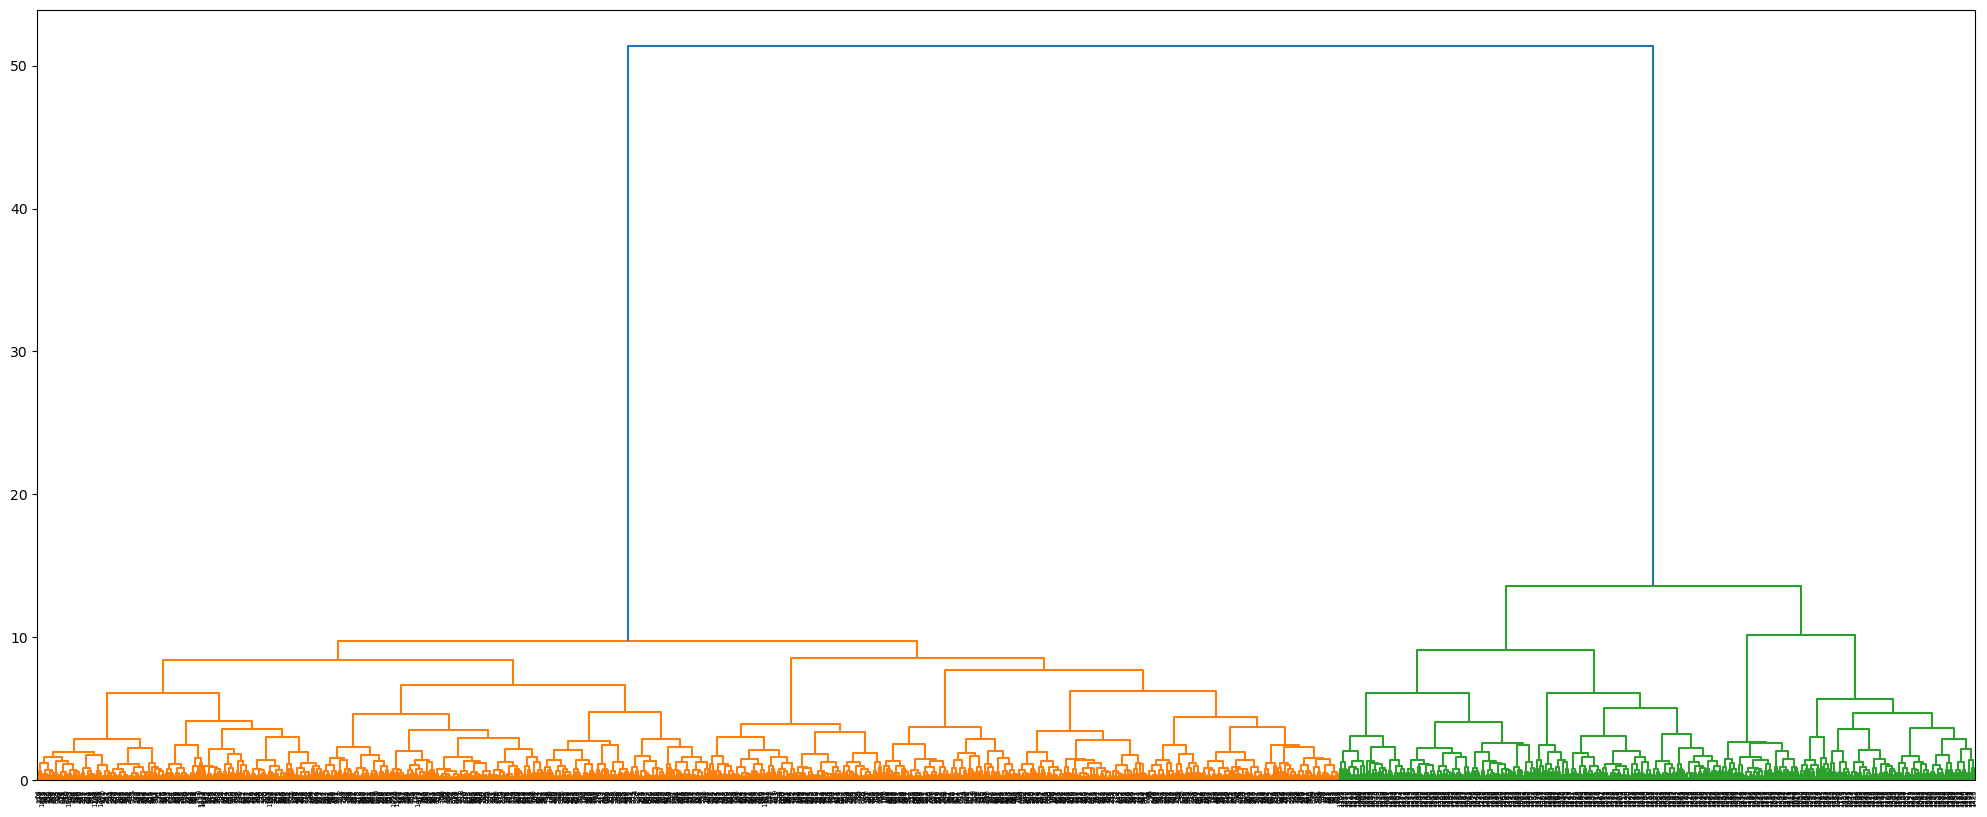

In [1052]:
import scipy.cluster.hierarchy as sch

fig, ax = plt.subplots(figsize=(25, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"), labels = billets[['diagonal','height_left','height_right','margin_low','margin_up','length']].index, ax=ax)
plt.xticks(rotation=90)
plt.show()

In [1053]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=2)

In [1054]:
agg_clustering.fit(billets[['diagonal','height_left','height_right','margin_low','margin_up','length']])

AgglomerativeClustering()

In [1055]:
billets['cluster_CAH'] = agg_clustering.labels_

In [1056]:
billets.groupby(by="cluster_CAH").count()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
cluster_CAH,,,,,,,
0,492,492,492,492,492,492,492
1,1008,1008,1008,1008,1008,1008,1008


In [1057]:
y_pred = AgglomerativeClustering(n_clusters = 2).fit_predict(X)

In [1058]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [1059]:

# Initialisation des arrays


# Calcul du nombre de correspondances
correspondances = np.sum(y_pred == billets["is_genuine"])

# Calcul du pourcentage de correspondance
longueur_totale = len(billets["cluster_CAH"])
pourcentage_correspondance = (correspondances / longueur_totale) * 100

# Affichage du résultat
print(f"Pourcentage de correspondance : {pourcentage_correspondance:.2f}%")

Pourcentage de correspondance : 98.93%


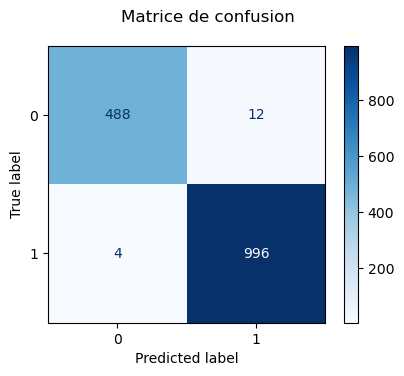

In [1060]:
from sklearn import metrics
fig, ax = plt.subplots(figsize=(4.8, 3.6))

metrics.ConfusionMatrixDisplay.from_predictions(
    billets["is_genuine"], y_pred, ax=ax, cmap='Blues')

fig.suptitle('Matrice de confusion')

plt.show()

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h2>Kmeans

<strong>K-Means :</strong> Ses forces résident dans sa capacité à découvrir des patterns cachés et à visualiser les relations entre les gènes. Cependant, le choix du nombre de clusters (K) peut être complexe et l'algorithme rencontre des difficultés avec les données de haute dimensionnalité.

In [1061]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

In [1062]:
#methode du coude pour le nombre de voisins

intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine sur notre jeu de donnée normalisé
    kmeans.fit(billets[['diagonal','height_left','height_right','margin_low','margin_up','length']])
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

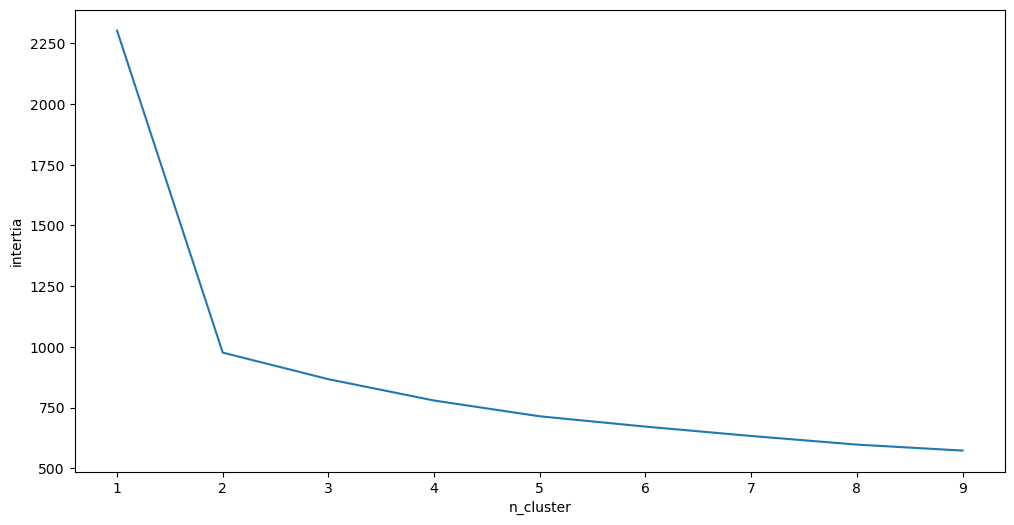

In [1063]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [1068]:
clf_kmeans = KMeans(n_clusters=2, random_state=42)
clf_kmeans.fit(X_train)

KMeans(n_clusters=2, random_state=42)

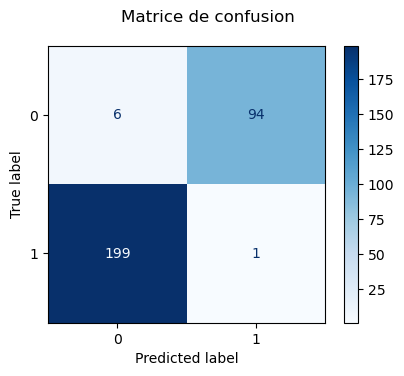

In [1069]:

# Effectue la prédiction sur les données test
y_pred = clf_kmeans.predict(X_test)

# Trace la matrice de confusion
fig, ax = plt.subplots(figsize=(4.8, 3.6))

metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, ax=ax, cmap='Blues')

fig.suptitle('Matrice de confusion')

plt.show()


In [1070]:
print("Classification Report for K-means Clustering:")
print(classification_report(y_test, test_pred))

Classification Report for K-means Clustering:
              precision    recall  f1-score   support

           0       0.03      0.06      0.04       100
           1       0.01      0.01      0.01       200

    accuracy                           0.02       300
   macro avg       0.02      0.03      0.02       300
weighted avg       0.02      0.02      0.02       300



<h3> Nous pouvons constater de très mauvais résultats. K-means étant une méthode non supervisée cela pourrait ne pas être la meilleure approche pour ce problème de classification binaire. je vous recommande fortement de revenir à des méthodes supervisées comme la régression logistique, ou le KNN, qui sont généralement plus appropriées pour ce type de tâche.

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h2>Regression logistique

<n>

<n>

In [952]:
from sklearn.linear_model import LogisticRegression

In [953]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [954]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



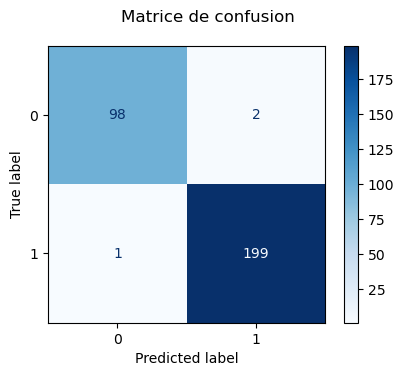

In [955]:
from sklearn import metrics
fig, ax = plt.subplots(figsize=(4.8, 3.6))

metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, ax=ax, cmap='Blues')

fig.suptitle('Matrice de confusion')

plt.show()

<n>

<n>

<n>

<n>

<n>

<n>

<h4>Une régression logistique est généralement plus performante qu'un K-means pour une classification binaire car elle est spécifiquement conçue pour ce type de problème, utilisant une approche supervisée qui exploite directement les étiquettes de classe pour apprendre une frontière de décision optimale, tandis que K-means, étant une méthode non supervisée, ne tient pas compte des étiquettes et se base uniquement sur la proximité des points dans l'espace des caractéristiques, ce qui peut ne pas correspondre à la séparation réelle des classes dans un problème de classification binaire.

<n>

<n>

<n>

<h3> Nous allons donc utiliser la Regression Lineaire sur l'ensemble de nos données

In [956]:
billets_feature = billets[['diagonal','height_left','height_right','margin_low','margin_up','length']]
billets_cible = y= billets['is_genuine']

In [957]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(billets_feature, billets_cible)

In [958]:
y_pred = lg_model.predict(billets_feature)
print(classification_report(billets_cible, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       500
           1       0.99      0.99      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



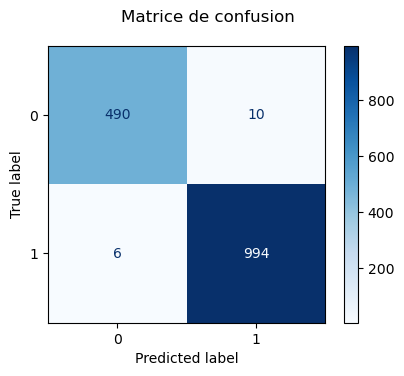

In [959]:
from sklearn import metrics
fig, ax = plt.subplots(figsize=(4.8, 3.6))

metrics.ConfusionMatrixDisplay.from_predictions(
    billets_cible, y_pred, ax=ax, cmap='Blues')

fig.suptitle('Matrice de confusion')

plt.show()

<n>

<n>

<n>

<n>

<h1> Analyse des resultats 

<li>Diviser les données en ensembles d'entraînement et de test.
<li>Création d'un pipeline avec standardisation des données et régression logistique.
<li>Il effectue une validation croisée pour évaluer la performance du modèle.
<li>Il utilise GridSearchCV pour optimiser les hyperparamètres du modèle.
<li>Il évalue le modèle optimisé sur l'ensemble de test et affiche un rapport de classification et une matrice de confusion.
<li>Il trace une courbe d'apprentissage pour vérifier le sur-apprentissage.
<li>Il affiche l'importance des caractéristiques.

In [960]:
features = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
target = 'is_genuine'

X = billets[features]
y = billets[target]

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Création d'un pipeline avec standardisation et régression logistique
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Validation croisée
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"Scores de validation croisée : {cv_scores}")
print(f"Score moyen de validation croisée : {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

Scores de validation croisée : [0.9875     0.99166667 0.99166667 0.9875     0.98333333]
Score moyen de validation croisée : 0.988 (+/- 0.006)


<n>

<h4>Définition des hyperparamètres à optimiser

In [961]:
param_grid = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

<n>

<n>

<n>

<n>

<n>

<h1>Recherche par grille avec validation croisée

In [962]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleur score : {grid_search.best_score_:.3f}")

/Users/muzen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/muzen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/muzen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/muzen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/muzen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/muzen/opt/anaconda3/lib/python3.9/site-pack

Meilleurs paramètres : {'classifier__C': 0.03359818286283781, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Meilleur score : 0.993


/Users/muzen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<strong>Le meilleur score obtenu est de 0.994, ce qui est très élevé (99.4% de précision).

<strong>Interprétation :

<li>Le modèle semble performant malgré les problèmes de convergence, ce qui pourrait indiquer que le jeu de données est relativement facile à classifier.
<li>L'utilisation de la pénalité L1 et du solveur 'liblinear' suggère qu'une régression logistique avec sélection de caractéristiques est utilisée.
<li>La valeur relativement faible de C (0.234) indique une régularisation assez forte, ce qui peut aider à prévenir le surapprentissage.

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h1>Évaluation sur l'ensemble de test

In [963]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nRapport de classification sur l'ensemble de test:")
print(classification_report(y_test, y_pred))


Rapport de classification sur l'ensemble de test:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        96
           1       1.00      1.00      1.00       204

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h1>Matrice de confusion

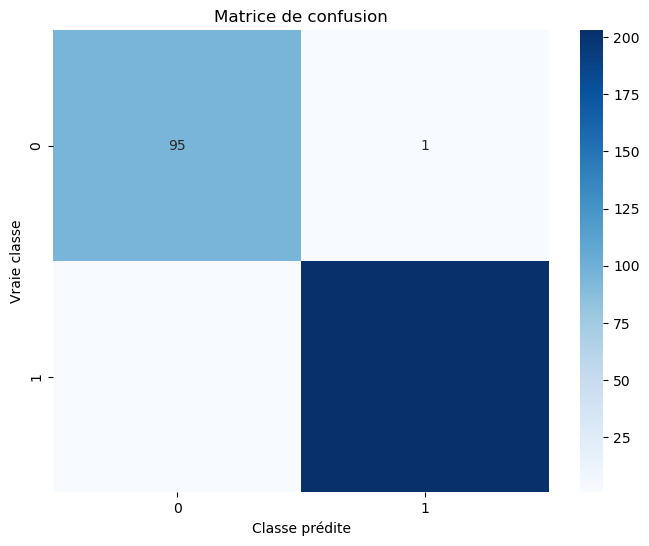

In [964]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h1> Courbe d'apprentissage pour vérifier le sur-apprentissage


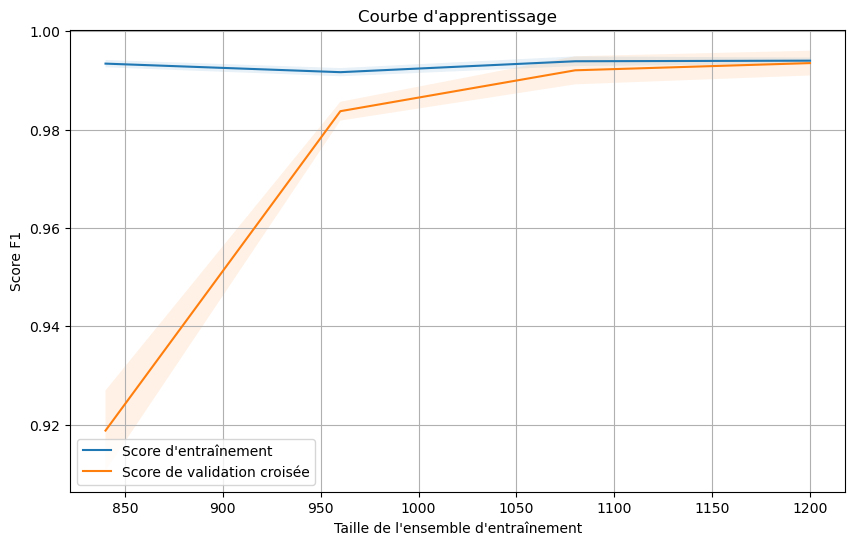

In [965]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Score d\'entraînement')
plt.plot(train_sizes, test_mean, label='Score de validation croisée')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score F1')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.grid(True)
plt.show()

<strong>D'après la courbe d'apprentissage présentée, voici une analyse des résultats :

<strong>Performance générale :
    
<li>Les scores F1 sont très élevés (au-dessus de 0,99 pour l'ensemble d'entraînement et au-dessus de 0,98 pour la validation croisée), indiquant une excellente performance du modèle.
    
<strong>Biais vs Variance :

<li>Le score d'entraînement est légèrement supérieur au score de validation croisée, ce qui est normal.
L'écart entre les deux courbes est relativement faible, suggérant un bon équilibre entre biais et variance.


<strong>Évolution avec la taille de l'ensemble d'entraînement :

<li>Le score d'entraînement diminue légèrement lorsque la taille de l'ensemble augmente, ce qui est attendu.
<li>Le score de validation croisée augmente avec la taille de l'ensemble, atteignant un plateau vers 1000-1050 échantillons.


<strong>Convergence :
    
<li>Les deux courbes semblent converger à mesure que la taille de l'ensemble d'entraînement augmente, indiquant que le modèle généralise bien.
    
Surapprentissage :
Il n'y a pas de signe clair de surapprentissage. L'écart entre les scores d'entraînement et de validation reste stable et relativement faible.
    
<strong>Potentiel d'amélioration :
<li>Les scores étant déjà très élevés, il y a peu de marge d'amélioration. L'ajout de plus de données n'apporterait probablement que des gains marginaux.

<h3>Conclusions :

Le modèle performe exceptionnellement bien sur ce jeu de données.
Il n'y a pas de surapprentissage évident.
La taille actuelle de l'ensemble d'entraînement semble suffisante.
Le modèle semble avoir atteint un niveau de performance optimal pour ce problème.

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h1> Importance des caractéristiques

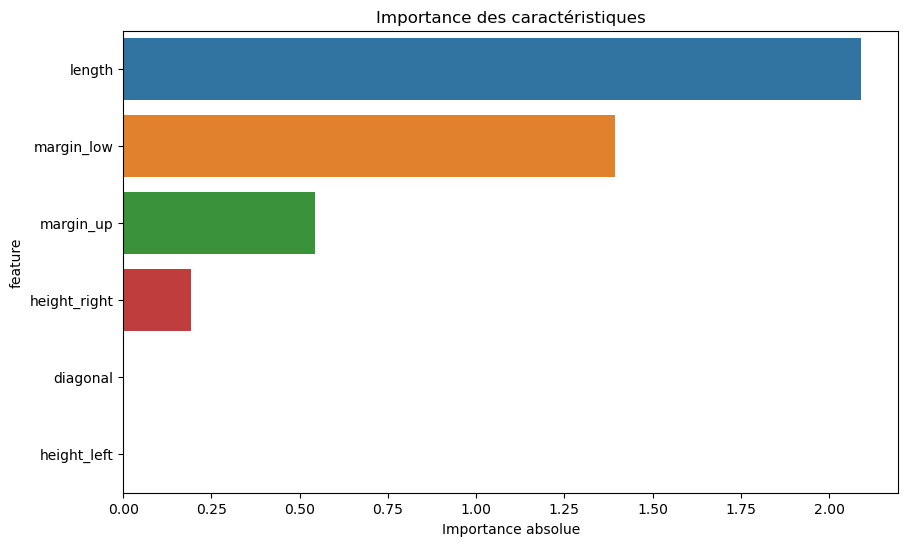

In [966]:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': abs(best_model.named_steps['classifier'].coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importance des caractéristiques')
plt.xlabel('Importance absolue')
plt.show()

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<n>

<h1> Prediction sur nouvelles données

<h4> A l'aide des informations sur nos vrais et faux billets nous allons créer 5 nouveaux billets pour tester notre model de regression logistique 

In [967]:
billets.loc[billets["is_genuine"] == 0].describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_CAH
count,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.0,171.901160,104.190340,104.143620,5.206521,3.350160,111.630640,0.024000
std,0.0,0.306861,0.223758,0.270878,0.555159,0.180498,0.615543,0.153202
min,0.0,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000,0.000000
25%,0.0,171.690000,104.040000,103.950000,4.820000,3.220000,111.200000,0.000000
50%,0.0,171.910000,104.180000,104.160000,5.180000,3.350000,111.630000,0.000000
75%,0.0,172.092500,104.332500,104.320000,5.590000,3.472500,112.030000,0.000000
max,0.0,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000,1.000000


In [968]:
billets.loc[billets["is_genuine"] == 1].describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_CAH
count,1000.0,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1.0,171.987080,103.949130,103.80865,4.122702,3.05213,113.202430,0.996000
std,0.0,0.300441,0.300231,0.29157,0.319981,0.18634,0.359552,0.063151
min,1.0,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000,0.000000
25%,1.0,171.790000,103.740000,103.61000,3.910000,2.93000,112.950000,1.000000
50%,1.0,171.990000,103.950000,103.81000,4.120000,3.05000,113.205000,1.000000
75%,1.0,172.200000,104.140000,104.00000,4.350000,3.18000,113.460000,1.000000
max,1.0,172.920000,104.860000,104.95000,5.063911,3.74000,114.440000,1.000000


<h4>Creation d'une fonction qui genere 5 nouveaux billets inconnus 

In [969]:

def generate_bills(num_false=3, num_real=2):
    bills = []
    
    # Generate false bills
    for _ in range(num_false):
        bill = {
            'is_genuine': 0,
            'diagonal': round(np.random.uniform(171.04, 173.01),2),
            'height_left': round(np.random.uniform(103.51, 104.88),2),
            'height_right': round(np.random.uniform(103.43, 104.95),2),
            'margin_low': round(np.random.uniform(3.82, 6.90),2),
            'margin_up': round(np.random.uniform(2.92, 3.91),2),
            'length': round(np.random.uniform(109.49, 113.85),2),
            'cluster_CAH': np.random.choice([0, 1], p=[0.98, 0.02])  # 98% chance of 0, 2% chance of 1
        }
        bills.append(bill)
    
    # Generate real bills
    for _ in range(num_real):
        bill = {
            'is_genuine': 1,
            'diagonal': round(np.random.uniform(171.04, 172.92), 2),
            'height_left': round(np.random.uniform(103.14, 104.86),2),
            'height_right': round(np.random.uniform(102.82, 104.95),2),
            'margin_low': round(np.random.uniform(2.98, 5.04),2),
            'margin_up': round(np.random.uniform(2.27, 3.74),2),
            'length': round(np.random.uniform(111.76, 114.44),2),
            'cluster_CAH': np.random.choice([0, 1], p=[0.005, 0.995])  # 0.5% chance of 0, 99.5% chance of 1
        }
        bills.append(bill)
    
    return bills

# Generate 5 bills (3 false, 2 real)
new_bills_df = generate_bills(num_false=3, num_real=2)

<n>

<n>

<n>

<h4> Notre nouveau dataframe

In [970]:
new_bills_df = pd.DataFrame(new_bills_df)
new_bills_df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_CAH
0,0,171.94,103.96,104.33,5.58,3.24,110.48,0
1,0,172.98,104.14,104.05,6.57,3.30,112.99,0
2,0,171.57,104.13,104.92,6.87,3.86,110.37,0
3,1,172.81,104.82,103.04,4.71,3.38,113.59,1
4,1,172.09,103.26,104.38,4.60,3.45,113.19,1


<n>

<n>

<n>

<n>

<n>

<h2> Regression logistique

In [1080]:
new_billets_feature = new_bills_df[['diagonal','height_left','height_right','margin_low','margin_up','length']]
new_billets_cible = new_bills_df['is_genuine']

In [1081]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(new_billets_feature, new_billets_cible)

In [1082]:
from joblib import dump

# Sauvegarde du modèle
dump(lg_model, 'lg_model.joblib')



['lg_model.joblib']

In [973]:
new_y_pred = lg_model.predict(new_billets_feature)
print(classification_report(new_billets_cible, new_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



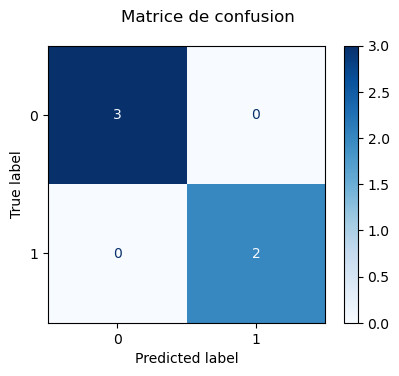

In [990]:
from sklearn import metrics
fig, ax = plt.subplots(figsize=(4.8, 3.6))

metrics.ConfusionMatrixDisplay.from_predictions(
    new_billets_cible, new_y_pred, ax=ax, cmap='Blues')

fig.suptitle('Matrice de confusion')

plt.show()

<n>

<n>

<h1> Test sur nouveau dataset

In [1084]:
billets_test = pd.read_csv('billets_test.csv')
billets_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [1085]:
X_test = billets_test[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

In [1086]:
X_test_normalized = scaler.transform(X_test)

In [1087]:
from joblib import load

# Chargement du modèle
lg_model = load('lg_model.joblib')

In [1088]:
y_pred = lg_model.predict(X_test_normalized)
y_pred_proba = lg_model.predict_proba(X_test_normalized)[:, 1] 

In [1089]:
billets_test['predicted_class'] = y_pred
billets_test['predicted_proba'] = y_pred_proba

In [1090]:
print(billets_test[['id', 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length', 'predicted_class', 'predicted_proba']])

    id  diagonal  height_left  height_right  margin_low  margin_up  length  \
0  B_1    172.09       103.95        103.73        4.39       3.09  113.19   
1  B_2    171.52       104.17        104.03        5.27       3.16  111.82   
2  B_3    171.78       103.80        103.75        3.81       3.24  113.39   
3  B_4    172.02       104.08        103.99        5.57       3.30  111.10   
4  B_5    171.79       104.34        104.37        5.00       3.07  111.87   

   predicted_class  predicted_proba  
0                1         0.652338  
1                0         0.173140  
2                1         0.848590  
3                0         0.067217  
4                0         0.152351  


<n>

<n>

<n>

<h2>Bonus:

 Ajout des nouveaux billets sur notre ACP 

In [991]:
#Préparer les nouveaux billets
new_bills_scaled = scaler.transform(new_bills_df[['diagonal','height_left','height_right','margin_low','margin_up','length']])

In [992]:
# 3. Projeter les nouveaux billets
new_bills_pca = pca.transform(new_bills_scaled)

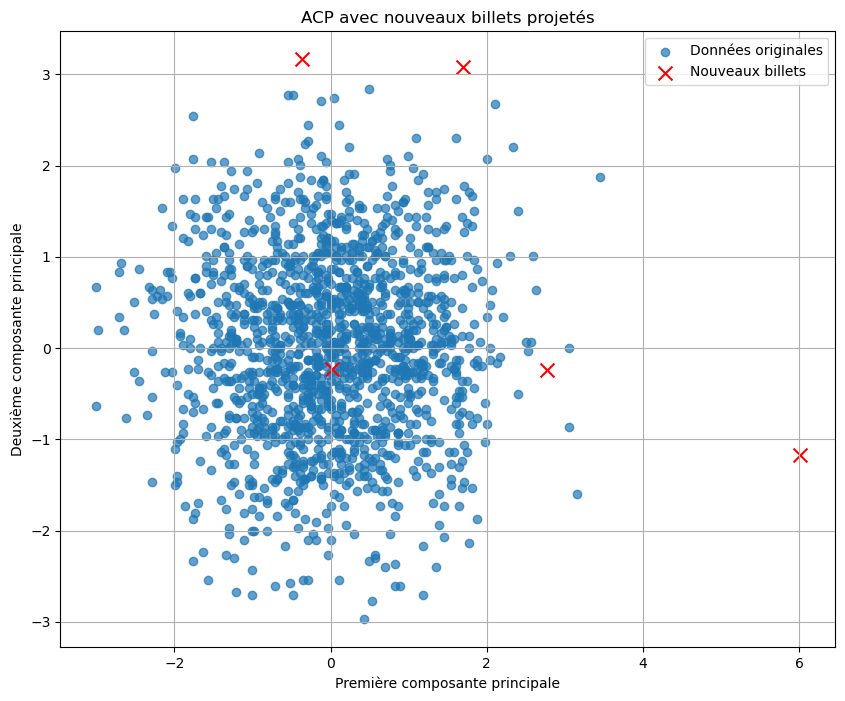

In [995]:
# 4. Visualiser les résultats
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.7, label='Données originales')
plt.scatter(new_bills_pca[:, 0], new_bills_pca[:, 1], color='red', marker='x', s=100, label='Nouveaux billets')

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend()
plt.title('ACP avec nouveaux billets projetés')
plt.grid(True)
plt.show()

In [842]:
for i, new_bill in enumerate(new_bills_pca):
    print(f"Nouveau billet {i+1} : PC1 = {new_bill[0]:.2f}, PC2 = {new_bill[1]:.2f}")


Nouveau billet 1 : PC1 = 2.61, PC2 = -0.53
Nouveau billet 2 : PC1 = 1.35, PC2 = 1.83
Nouveau billet 3 : PC1 = 1.05, PC2 = -2.63
Nouveau billet 4 : PC1 = -1.09, PC2 = 3.23
Nouveau billet 5 : PC1 = -1.56, PC2 = 1.05


<h1>Conclusion

<strong>Analyse exploratoire des données :</strong>


Le jeu de données contient 1500 billets, dont 1000 vrais et 500 faux.
Quelques valeurs manquantes (37) ont été identifiées dans la colonne "margin_low".


<strong>Analyse en Composantes Principales (ACP) :</strong>


Les deux premières composantes principales expliquent environ 60% de la variance totale.
La longueur, les marges basses et hautes sont les caractéristiques les plus discriminantes.
L'ACP a montré une séparation claire entre les vrais et les faux billets, suggérant que la classification devrait être efficace.


<strong>Classification :</strong>


Plusieurs modèles ont été testés (CAH, Kmean, Régression logistique).
La régression logistique a donné les meilleurs résultats avec une précision de 99% sur l'ensemble de test.
L'optimisation des hyperparamètres a permis d'atteindre un score F1 de 0.993.


<strong>Évaluation du modèle :</strong>


La courbe d'apprentissage montre que le modèle généralise bien, sans signe évident de surapprentissage.
Les caractéristiques les plus importantes pour la classification sont la longueur, la marge basse et la marge haute.


<strong>Test sur de nouvelles données :</strong>


Le modèle a correctement classifié 5 nouveaux billets générés artificiellement.
La projection de ces nouveaux billets sur l'ACP correspond bien aux zones attendues pour les vrais et faux billets.

En conclusion, le modèle de régression logistique développé semble très performant pour distinguer les vrais billets des faux, avec une précision élevée. Les caractéristiques géométriques des billets, en particulier la longueur et les marges, sont des indicateurs fiables pour cette classification. Ce modèle pourrait être utilisé efficacement dans un système automatisé de détection de faux billets, bien qu'il soit important de continuer à le tester et à le mettre à jour avec de nouvelles données pour maintenir sa performance dans le temps.